In [1]:
import cv2
import glob
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
gen_sign = [glob.glob('Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
            glob.glob('Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
            glob.glob('Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
            glob.glob('Dataset_Signature_Final/Dataset/dataset4/real/*.*')]
 
forg_sign = [glob.glob('Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
             glob.glob('Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
             glob.glob('Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
             glob.glob('Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

In [3]:
def load_images(file_list):
    images = [] 
    for files in file_list:
        for file in files: 
            img = cv2.imread(file) 
            images.append(img)
    return images

In [4]:
gen_imgs = load_images(gen_sign)

forg_imgs = load_images(forg_sign)

In [5]:
print(gen_imgs[0])

[[[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 251 239]
  [253 251 241]
  [253 252 242]]

 [[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 252 241]
  [253 251 240]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [252 252 244]
  ...
  [253 251 240]
  [253 251 239]
  [253 251 240]]

 ...

 [[252 252 243]
  [253 252 242]
  [253 252 241]
  ...
  [253 252 242]
  [253 252 242]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [253 252 242]
  ...
  [253 252 241]
  [252 252 242]
  [252 252 243]]

 [[253 252 242]
  [252 252 242]
  [253 252 243]
  ...
  [253 251 240]
  [253 251 239]
  [253 252 241]]]


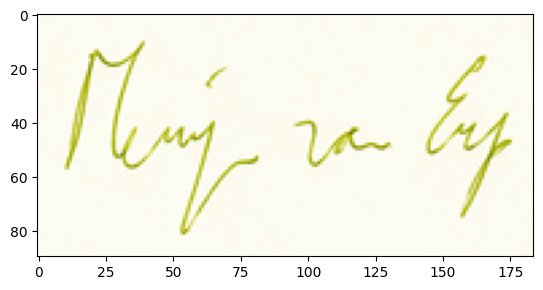

In [6]:
plt.imshow(gen_imgs[1])
plt.show()

In [7]:
gen_imgs[0].shape

(88, 191, 3)

In [8]:
cv2.imshow('Genuin Signature', gen_imgs[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
num_gen = sum([len(x) for x in gen_sign])
num_forg=sum([len(x) for x in forg_sign])
print (f'Number of real signatures: {num_gen}')
print(f'Number of forged signatures: {num_forg}')

Number of real signatures: 360
Number of forged signatures: 360


In [10]:
gen_shape = [x.shape for x in gen_imgs]
forg_shape = [x.shape for x in forg_imgs]
print('shape of real images:', gen_shape[:5])
print('shape of forged images:', forg_shape[:5])

gen_color = [x.shape[2] for x in gen_imgs]
forg_color= [x.shape[2] for x in forg_imgs]
print('Color channels of real images: ', gen_color[:5])
print('Color channels of forged images: ',forg_color[:5])

gen_pixels = [x.mean() for x in gen_imgs]
forg_pixels = [x.mean() for x in forg_imgs]

print('Mean pixels values of real images: ',gen_pixels[:5])
print('Mean pixels value of forged images: ',forg_pixels[:5])

shape of real images: [(88, 191, 3), (90, 184, 3), (80, 202, 3), (90, 186, 3), (90, 194, 3)]
shape of forged images: [(83, 226, 3), (118, 223, 3), (91, 272, 3), (76, 161, 3), (83, 166, 3)]
Color channels of real images:  [3, 3, 3, 3, 3]
Color channels of forged images:  [3, 3, 3, 3, 3]
Mean pixels values of real images:  [242.76453672854197, 243.156038647343, 243.3089315181518, 243.03986459577857, 242.72010309278352]
Mean pixels value of forged images:  [242.45354870810675, 243.70669605533178, 243.68103587588882, 239.77849515092078, 243.47038757439395]


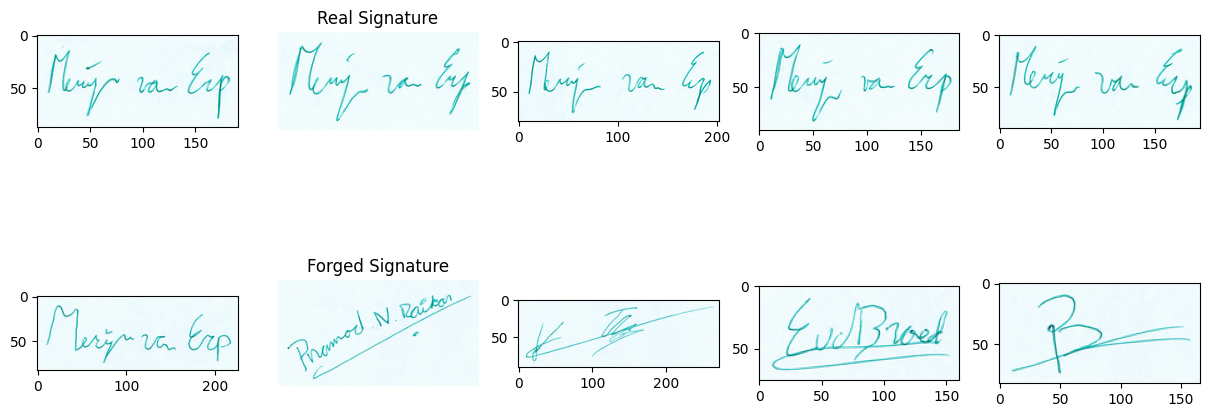

In [11]:
fig,ax = plt.subplots (2,5,figsize =(15,6))

for i in range(5):
    ax[0,i].imshow(cv2.cvtColor(gen_imgs[i],cv2.COLOR_BGR2RGB))
    ax[0,1].set_title('Real Signature')
    ax[0,1].axis('off')
    ax[1,i].imshow(cv2.cvtColor(forg_imgs[i],cv2.COLOR_BGR2RGB))
    ax[1,1].set_title('Forged Signature')
    ax[1,1].axis('off')
plt.show()

In [12]:
image_data = pd.DataFrame(columns=['Type', 'Shape', 'Color Channels', 'Mean Pixel Value'])

In [13]:
data_list = []

# Append data for genuine signatures
for i in range(len(gen_shape)):
    data_list.append({'Type': 'Real',
                      'Shape': gen_shape[i],
                      'Color Channels': gen_color[i],
                      'Mean Pixel Value': gen_pixels[i]})

In [14]:
for i in range(len(forg_shape)):
    data_list.append({'Type': 'Forged',
                      'Shape': forg_shape[i],
                      'Color Channels': forg_color[i],
                      'Mean Pixel Value': forg_pixels[i]})

# Convert the list of dictionaries to a DataFrame
image_data = pd.DataFrame(data_list)

In [15]:
image_data.head()

,Type,Shape,Color Channels,Mean Pixel Value
0,Real,"(88, 191, 3)",3,242.764537
1,Real,"(90, 184, 3)",3,243.156039
2,Real,"(80, 202, 3)",3,243.308932
3,Real,"(90, 186, 3)",3,243.039865
4,Real,"(90, 194, 3)",3,242.720103


In [16]:
image_data.tail()

,Type,Shape,Color Channels,Mean Pixel Value
715,Forged,"(382, 1010, 3)",3,240.179306
716,Forged,"(532, 1552, 3)",3,243.524036
717,Forged,"(386, 1023, 3)",3,240.151832
718,Forged,"(571, 1402, 3)",3,243.676428
719,Forged,"(336, 965, 3)",3,238.301999


In [17]:
image_data.shape

(720, 4)

In [18]:
print(image_data.describe())

       Color Channels  Mean Pixel Value
count           720.0        720.000000
mean              3.0        243.039370
std               0.0          5.213333
min               3.0        226.423019
25%               3.0        239.804540
50%               3.0        242.563931
75%               3.0        247.552634
max               3.0        252.423212


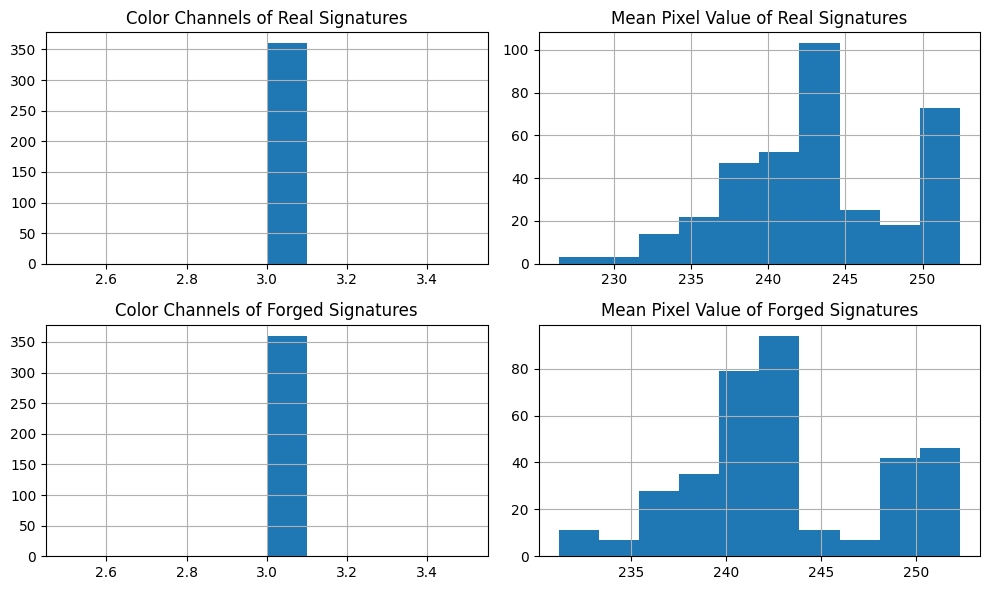

In [19]:
fig, ax = plt.subplots(2,2,figsize=(10,6))
image_data[image_data['Type']=='Real']['Color Channels'].hist(ax=ax[0,0])
image_data[image_data['Type']=='Forged']['Color Channels'].hist(ax=ax[1,0])
image_data[image_data['Type']=='Real']['Mean Pixel Value'].hist(ax=ax[0,1])
image_data[image_data['Type']=='Forged']['Mean Pixel Value'].hist(ax=ax[1,1])
ax[0,0].set_title('Color Channels of Real Signatures')
ax[0,1].set_title('Mean Pixel Value of Real Signatures')
ax[1,0].set_title('Color Channels of Forged Signatures')
ax[1,1].set_title('Mean Pixel Value of Forged Signatures')

plt.tight_layout()
plt.show()